In [1]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


First 5 rows:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Data Summary:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


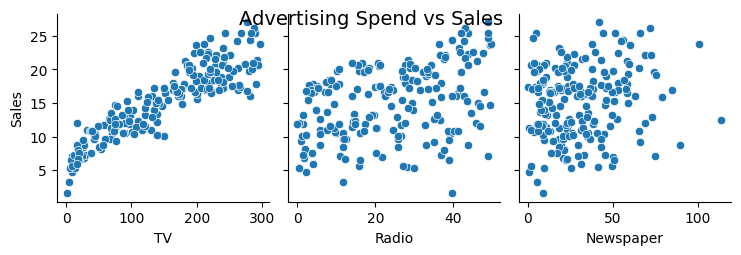

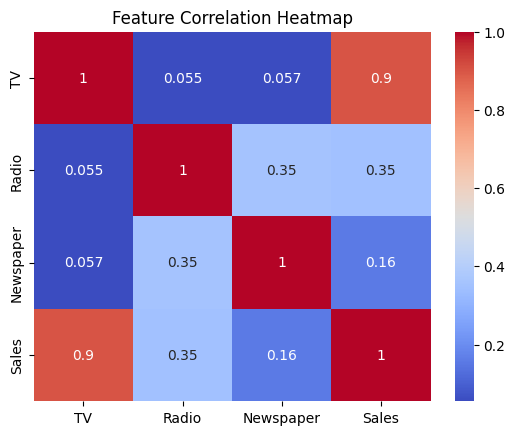

R² Score: 0.906
MSE: 2.908

Feature Coefficients:
      Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


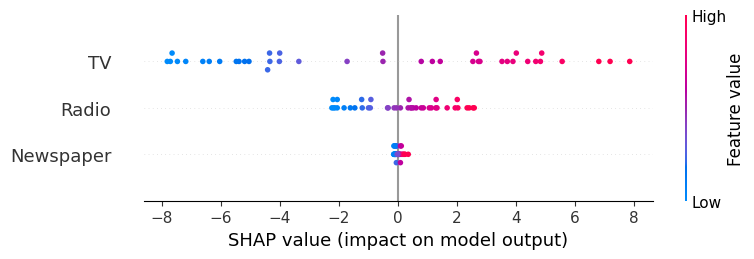


📢 Predict Sales Based on Your Inputs!
Enter TV Advertising Spend: 765
Enter Radio Advertising Spend: 98
Enter Newspaper Advertising Spend: 765
🔮 Predicted Sales: 59.62


In [ ]:
# SALES PREDICTION USING MACHINE LEARNING
# CODSOFT Internship Project by Ashitha T.

# Step 1: Imported the Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap
import warnings
warnings.filterwarnings('ignore')

#  Step 2: Load the Dataset
df = pd.read_csv('advertising.csv')
print("First 5 rows:\n", df.head())
print("\nData Summary:\n", df.describe())

#  Step 3: Exploratory Data Analysis
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.suptitle("Advertising Spend vs Sales", fontsize=14)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#  Step 4: Prepare Data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#  Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")

#  Step 7: Feature Impact (Coefficients)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:\n", coef_df)

#  Step 8: SHAP Explainability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

import pandas as pd  # ✅ Make sure this is at the top

print("\n Predict Sales Based on Inputs!")

# Get user inputs
tv_input = float(input("Enter TV Advertising Spend: "))
radio_input = float(input("Enter Radio Advertising Spend: "))
newspaper_input = float(input("Enter Newspaper Advertising Spend: "))

# Prepare input for prediction
user_input = pd.DataFrame([[tv_input, radio_input, newspaper_input]],
                          columns=['TV', 'Radio', 'Newspaper'])

# Predict
user_pred = model.predict(user_input)[0]
print(f" Predicted Sales: {user_pred:.2f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(f"Random Forest R² Score: {r2_score(y_test, rf_pred):.3f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_pred):.3f}")


Random Forest R² Score: 0.953
Random Forest MSE: 1.437


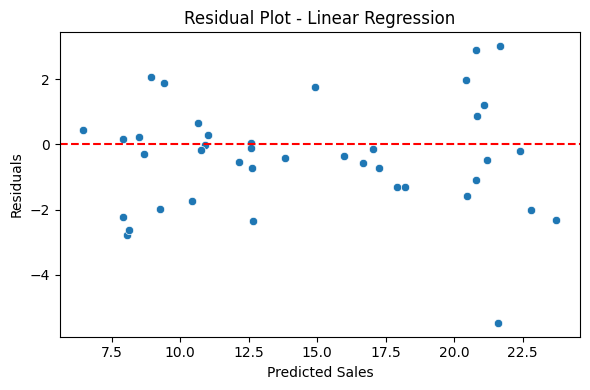

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.3f}")


Cross-validated R² Scores: [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Mean CV R²: 0.895


In [ ]:
predictions_df = pd.DataFrame({'TV': X_test['TV'], 'Radio': X_test['Radio'], 'Newspaper': X_test['Newspaper'],
                               'Actual Sales': y_test, 'Predicted Sales': y_pred})
predictions_df.to_csv('sales_predictions.csv', index=False)
